<a href="https://colab.research.google.com/github/AdityaVarmaUddaraju/anime_or_cartoon/blob/master/anime_cartoon_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'anime'
file = 'anime.txt'

In [0]:
path = Path(base_dir + 'data/animation')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'cartoon'
file = 'cartoon.txt'

In [0]:
path = Path(base_dir + 'data/animation')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/animation/anime'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/animation/cartoon')]

In [0]:
download_images('./gdrive/My Drive/fastai-v3/data/animation/cartoon/cartoon.txt', dest, max_pics=200)

Error https://newmoon.com/wp-content/uploads/2017/07/bystander-panel1-e1501462153859.png HTTPSConnectionPool(host='newmoon.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/07/bystander-panel1-e1501462153859.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f58c4e7d9e8>, 'Connection to newmoon.com timed out. (connect timeout=4)'))


In [0]:
download_images('./gdrive/My Drive/fastai-v3/data/animation/anime/anime.txt', dest, max_pics=200)

In [0]:
classes = ['anime', 'cartoon']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['anime', 'cartoon']

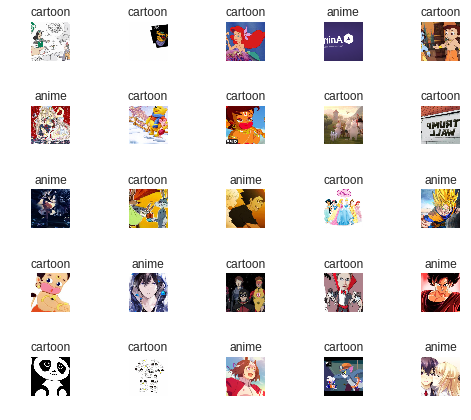

In [0]:
data.show_batch(row=3, figsize=(7,6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['anime', 'cartoon'], 2, 260, 64)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.798089,0.386258,0.203125
2,0.629504,0.204170,0.062500
3,0.508434,0.165701,0.093750
4,0.437635,0.161050,0.078125


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


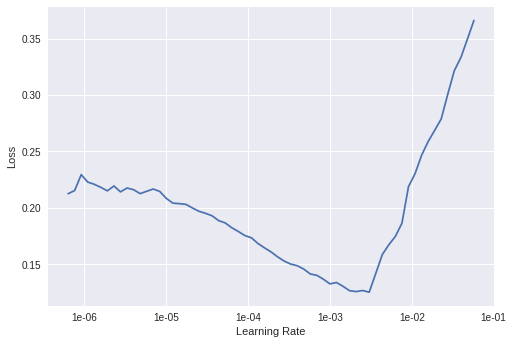

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.252836,0.306958,0.125000
2,0.197302,0.287460,0.125000


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

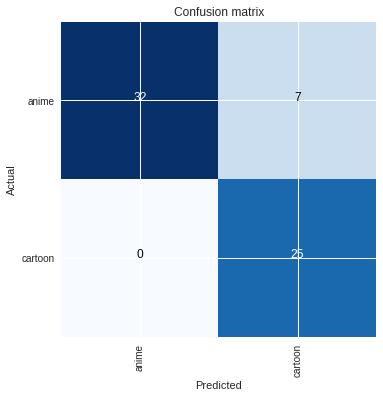

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

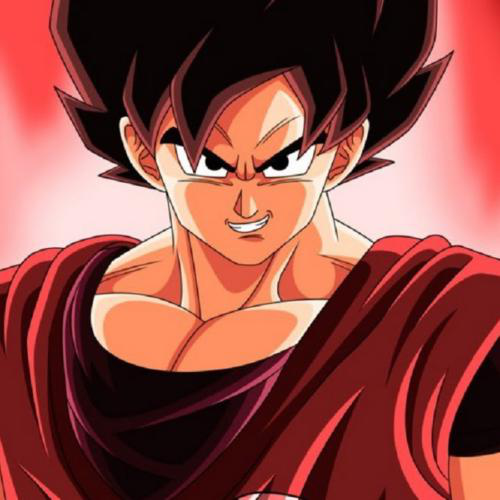

In [0]:
img = open_image(path/'anime'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category anime